In [1]:
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Sim_period = 50  # seconds
Sim_fs   = 10000  # samples per seconds

Sim_dt = 1/Sim_fs
Sim_t = np.arange(0,Sim_period,Sim_dt)

In [23]:
R_leak = 1e7
g_leak = 1 / R_leak
R_L = 1e5
g_L = 1 / R_L
L = 2500
C = .0000001 
V_leak = -0.03*50

R_Na = R_L *3  # 3e5
g_Na = 1 / R_Na
V_Na = 140e-3

I_stim = 4e-6

tau_L = L / R_L
tau_C = 1 / (C * R_leak)

print('Inductor time constant:', tau_L, 's')
print('Capacitor time constant:', tau_C, 's')
print('Resonance frequency:', 1/(2*np.pi*np.sqrt(L*C)), 'Hz')
# print('Quality factor:', np.sqrt(L)/(R_L*np.sqrt(C)))

Inductor time constant: 0.025 s
Capacitor time constant: 1.0 s
Resonance frequency: 10.065842420897408 Hz


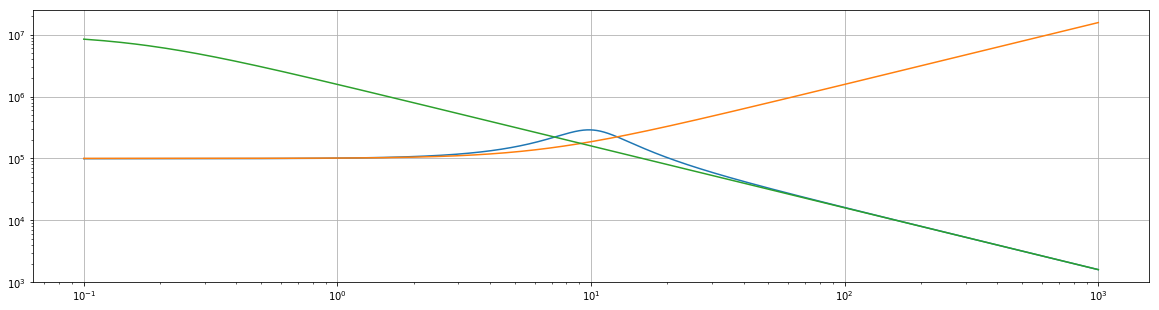

In [24]:
f = np.arange(.1,1000,.01)  # kHz
w = 2 * np.pi * f

R_L = 1 / g_L
R_leak = 1 / g_leak

z = (g_leak + 1j*w*C + 1/(1j*w*L + R_L)) ** -1
z_amp = np.sqrt(z.real**2 + z.imag**2)

z_L = 1j*w*L + R_L
z_L_amp = np.sqrt(z_L.real**2 + z_L.imag**2)

z_C = (1j * w * C + g_leak) ** -1
z_C_amp = np.sqrt(z_C.real**2 + z_C.imag**2)

plt.figure(figsize=(20,5))
plt.loglog(f, z_amp)
plt.loglog(f, z_L_amp)
plt.loglog(f, z_C_amp)
plt.grid()
plt.show()

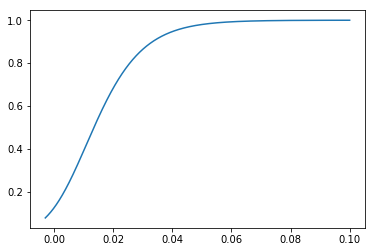

In [25]:
k = 1
V_half = 0

Vm = np.arange(-.003, .1, .000001)

Boltzman_nl = k / (1 + np.exp(100*(V_half - Vm)))
plt.plot(Vm, Boltzman_nl**3)
plt.show()

In [26]:
I = I_stim * np.ones(Sim_t.shape)  # pA
# Sim_t = Sim_t[:Sim_fs*1]
# slope
slope = fn.gen_slope(init_time=0,
                   end_time= .2,
                   time_points=Sim_t)


I1 = fn.gen_sin(init_time=0,
                freq=1000,
                phase=0,
                time_points=Sim_t)
I2 = fn.gen_sin(init_time=0,
                freq=1002,
                phase=0,
                time_points=Sim_t)
I3, freq = fn.gen_chirp(Chirp_init_freq=1000, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=1020, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

I = slope * I_stim * (I1 + I3) * 1

# I3 = fn.gen_pulse(init_time=1,
#                   on_width=47,
#                   off_width=1,
#                   time_points=Sim_t)

# # Chirp stimulation
out, freq = fn.gen_chirp(Chirp_init_freq=0.1, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=20, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

# I      = slope * I_stim * out # pA

In [28]:
for i in range(I.shape[0]-1):
    
    #non-linearity
#     if Vm[i] > 0:
#         nl = slope[i]
#     else:
#         nl = 0
    
    nl[i] = k / (1 + np.exp(100*(V_half - Vm[i])))
    nl[i]=nl[i]**3 * 1.11
    
    # current through the leak branch
    I_leak = g_leak * (Vm[i] - V_leak)
    
    # current through the membrane capacitance
    I_Na = g_Na * nl[i] * (Vm[i] - V_Na)
    
    # current through the inductor
    I_L_ss = Vm[i] * g_L
    dILdt = (I_L_ss - I_L[i]) / tau_L
    I_L[i+1] = I_L[i] + dILdt * Sim_dt
    
#     if Vm[i] > 0.05:
#     I_L[i] = 0
#     I_leak = 0
#     I_Na = 0
    
    dVmdt = (I[i] - I_leak - I_Na - I_L[i]) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

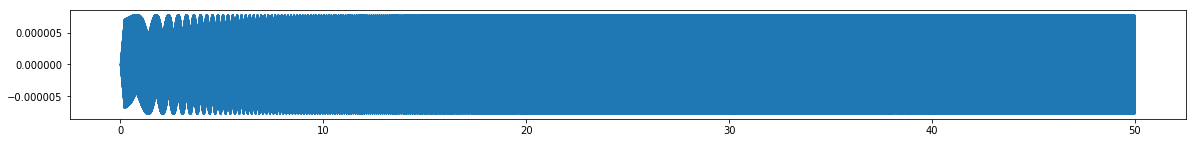

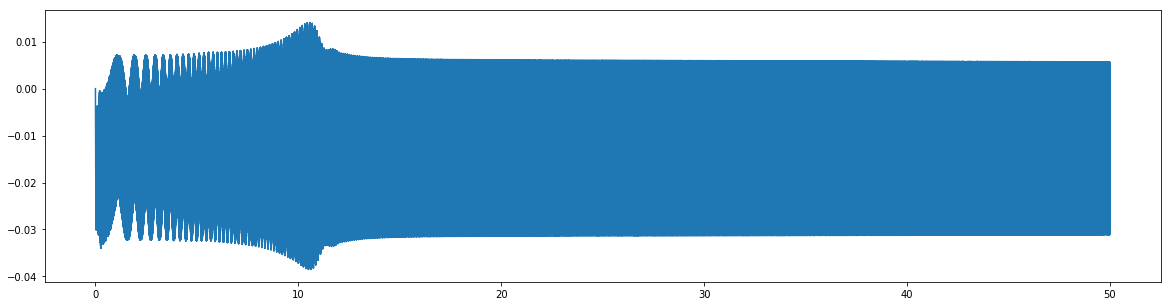

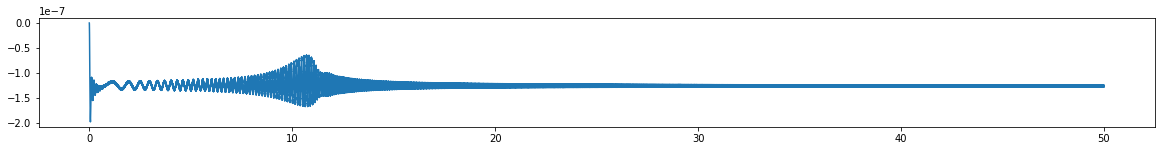

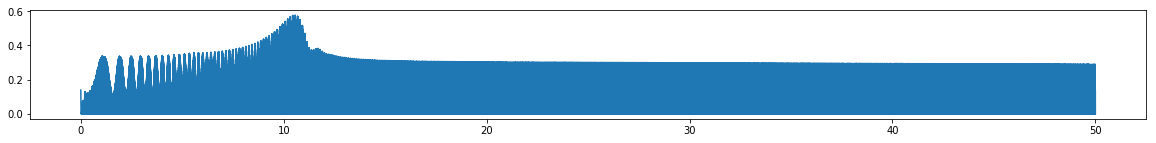

In [29]:
plt.figure(figsize=(20,2))
plt.plot(Sim_t, I)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Sim_t, Vm)
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, I_L)
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, nl)
plt.show()